In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.preprocessing import clean

C:\Users\Light\.virtualenvs\disaster-EXdKZbpW\lib\site-packages\ekphrasis\classes\tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


C:\Users\Light\.virtualenvs\disaster-EXdKZbpW\lib\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


In [2]:
df = pd.read_csv("../data/entire_corpus.csv")
df['text'] = df['text'].apply(clean)
df['keyword'] = df['keyword'].fillna('_')
df.head()

,id,keyword,location,text,target,source
0,1,_,NaN,our deeds are the reason of this earthquake ma...,1,train
1,4,_,NaN,forest fire near la ronge sask canada,1,train
2,5,_,NaN,all residents asked to shelter in place are be...,1,train
3,6,_,NaN,people receive wildfires evacuation orders in...,1,train
4,7,_,NaN,just got sent this photo from ruby alaska as s...,1,train


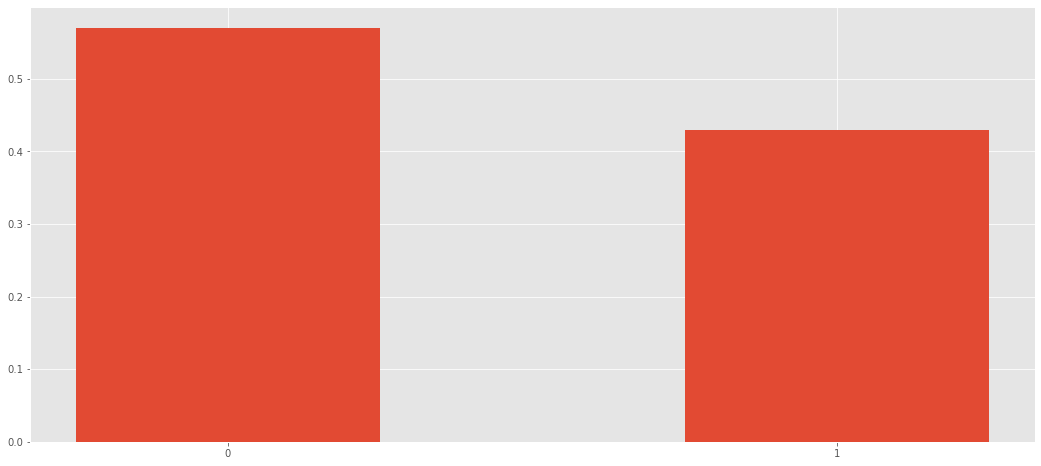

In [3]:
plt.figure(figsize=(18, 8))
ax = df['target'].hist(density=True, rwidth=0.5, bins=np.arange(3)-0.5)
ax.set_xticks([0, 1])

* 57% of tweets are labelled as 0 (non-disaster)
* 43% of tweets are labelled as 1 (disaster)

## Tweets length

In [4]:
df['length'] = df['text'].apply(lambda r: len(r.split(' ')))

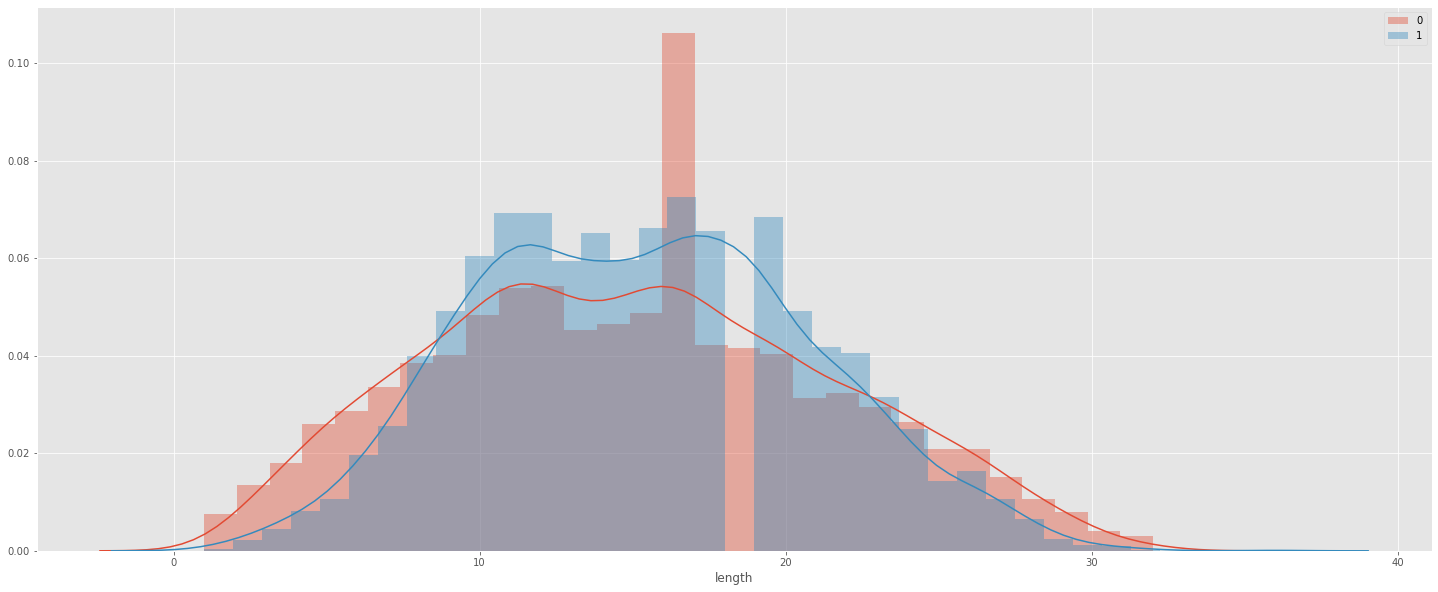

In [5]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.distplot(df[df['target'] == 0]['length'], label='0')
sns.distplot(df[df['target'] == 1]['length'], label='1')
plt.legend()

* Real disaster tweets usually have a length of 10-20 words.
* Very short/long tweet tends to be fake disaster tweets.

## Vocabulary

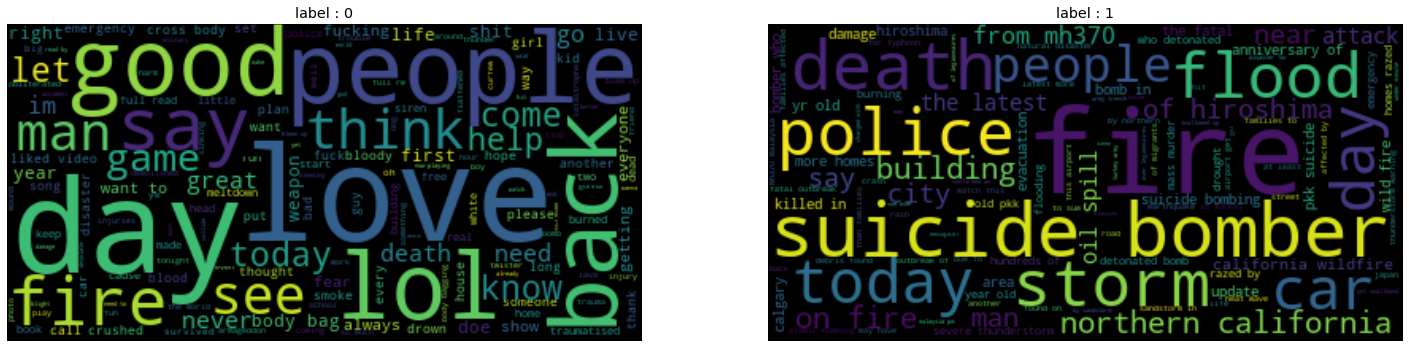

In [6]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, axs = plt.subplots(1, 2, figsize=(25, 7))
labels = [0, 1]
stop_words = STOPWORDS.union(['thi', 'new', 'wa', 'ha', 'via', 'one', 'got', 'still', 'now', 'us',
                              'thing', 'will', 'hi', 'really', 'going', 'rt', 'time', 'the'])

for i, label in enumerate(labels):
    corpus = df[df['target'] == label]['text']
    text = ' '.join(corpus)
    
    ax = axs[i]
    wordcloud = WordCloud(stopwords=stop_words).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'label : {label}')

* Read disaster tweets tend to deal with catastrophes and negative events (death, storm, flood, bomber...)
* Non-disaster tweets uses more common and positive words (love, people, day, good...)

## Keywords

In [7]:
keywords = df['keyword'].unique()
print(len(keywords))
keywords

222


array(['_', 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

* There are composed words : burning%20buildings, bush%20fires...

**How many tweets use these words ?**

In [8]:
keyed_df = df[df['keyword'] != '_'].copy()
keyed_df['use_keywords'] = keyed_df.apply(lambda r: 1 if len(set(r['keyword'].split('%20')).intersection(r['text'].split(' '))) > 0 else 0, axis=1)

Text(0.5, 1.0, 'Test set')

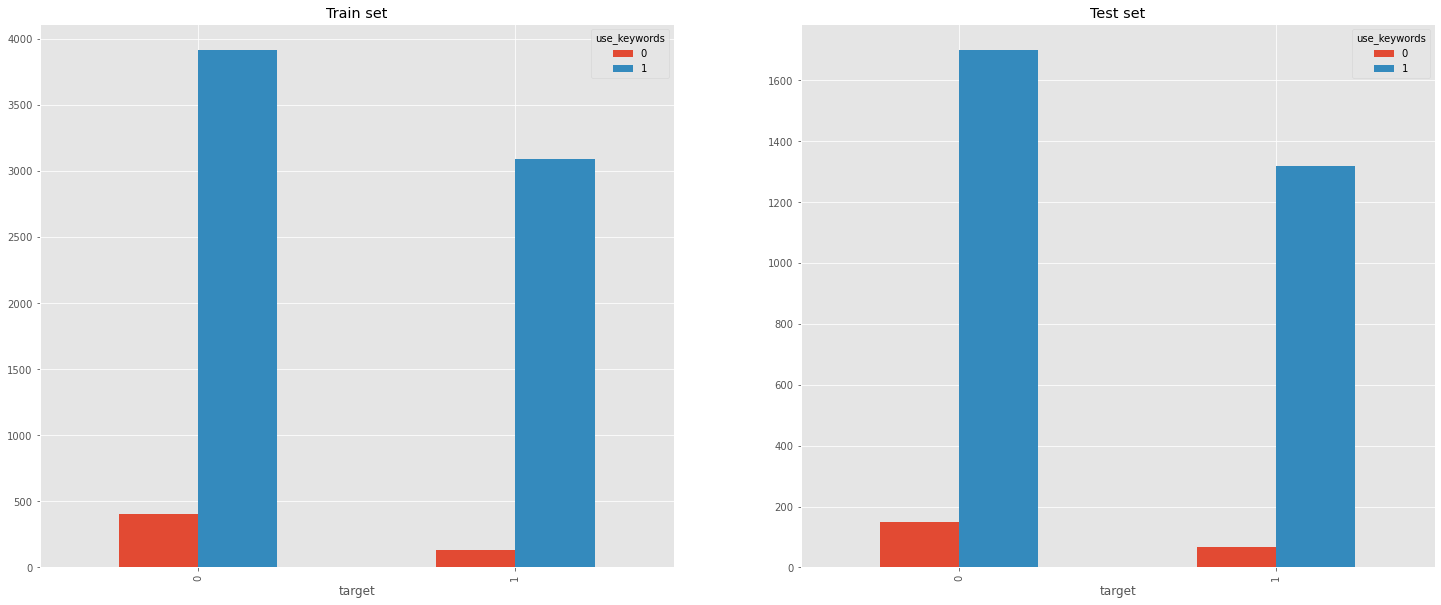

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(25, 10))

sub_df = keyed_df[keyed_df['source'] == 'train']
v = pd.crosstab(sub_df['target'], sub_df['use_keywords'])
ax = axs[0]
v.plot.bar(ax=ax)
ax.set_title('Train set')

sub_df = keyed_df[keyed_df['source'] == 'test']
v = pd.crosstab(sub_df['target'], sub_df['use_keywords'])
ax = axs[1]
v.plot.bar(ax=ax)
ax.set_title('Test set')

* No difference between train & test sets
* Tweets usually use the keyword
* Non-disaster tweets has a higher proportion than disaster tweets concerning the non-use of keywords

**How many tweets per keywords ?**

In [10]:
df.groupby('keyword').count()['text']

keyword
_                      87
ablaze                 50
accident               50
aftershock             50
airplane%20accident    50
                       ..
wounded                50
wounds                 50
wreck                  50
wreckage               50
wrecked                50
Name: text, Length: 222, dtype: int64

* Seems like data contains 50 tweets for almost each keywords
* There are 87 tweets without keywords

In [11]:
(df.shape[0] - 87) / 222

48.5990990990991

**Looking at an example**

In [12]:
keyword = 'storm'
subdf = df[df['keyword'] == keyword]
print(subdf.shape)
subdf.head(10)

(50, 7)


,id,keyword,location,text,target,source,length
6258,8942,storm,NaN,finally a storm,0,train,3
6259,8944,storm,NaN,game feed warcraft inspired mode likely hitti...,0,train,22
6260,8945,storm,"State College, Pa",typhoon soudelor was captured in this incredib...,1,train,16
6261,8946,storm,NaN,so this storm just came out of no where fuck m...,1,train,13
6262,8947,storm,Somewhere Only We Know ?,omfg i just woke up again,0,train,7
6263,8948,storm,NaN,new on ebay uk star wars storm trooper pop vin...,0,train,16
6264,8949,storm,"Chicago, IL",how to prepare your property for a storm,1,train,9
6265,8952,storm,NaN,kesabaran membuahkan hasil indah pada saat tep...,1,train,27
6266,8953,storm,mind ya business,come but why is it bout to storm tho,1,train,10
6267,8955,storm,nor*cal,rt the person who dances with you in the rain ...,0,train,20


**Labels per keywords**

In [13]:
def proportion_disaster(df):
    return df.sum() / df.shape[0]

grouped_df_train = df[df['source'] == 'train'].groupby('keyword').agg({'target': proportion_disaster})
grouped_df_test = df[df['source'] == 'test'].groupby('keyword').agg({'target': proportion_disaster})

grouped_df = pd.DataFrame()
grouped_df['keyword'] = grouped_df_train.index
grouped_df['train'] = grouped_df_train.values
grouped_df['test'] = grouped_df_test.values

grouped_df

,keyword,train,test
0,_,0.688525,0.615385
1,ablaze,0.361111,0.142857
2,accident,0.685714,0.266667
3,aftershock,0.000000,0.125000
4,airplane%20accident,0.857143,0.866667
...,...,...,...
217,wounded,0.702703,0.846154
218,wounds,0.303030,0.294118
219,wreck,0.189189,0.153846
220,wreckage,1.000000,1.000000


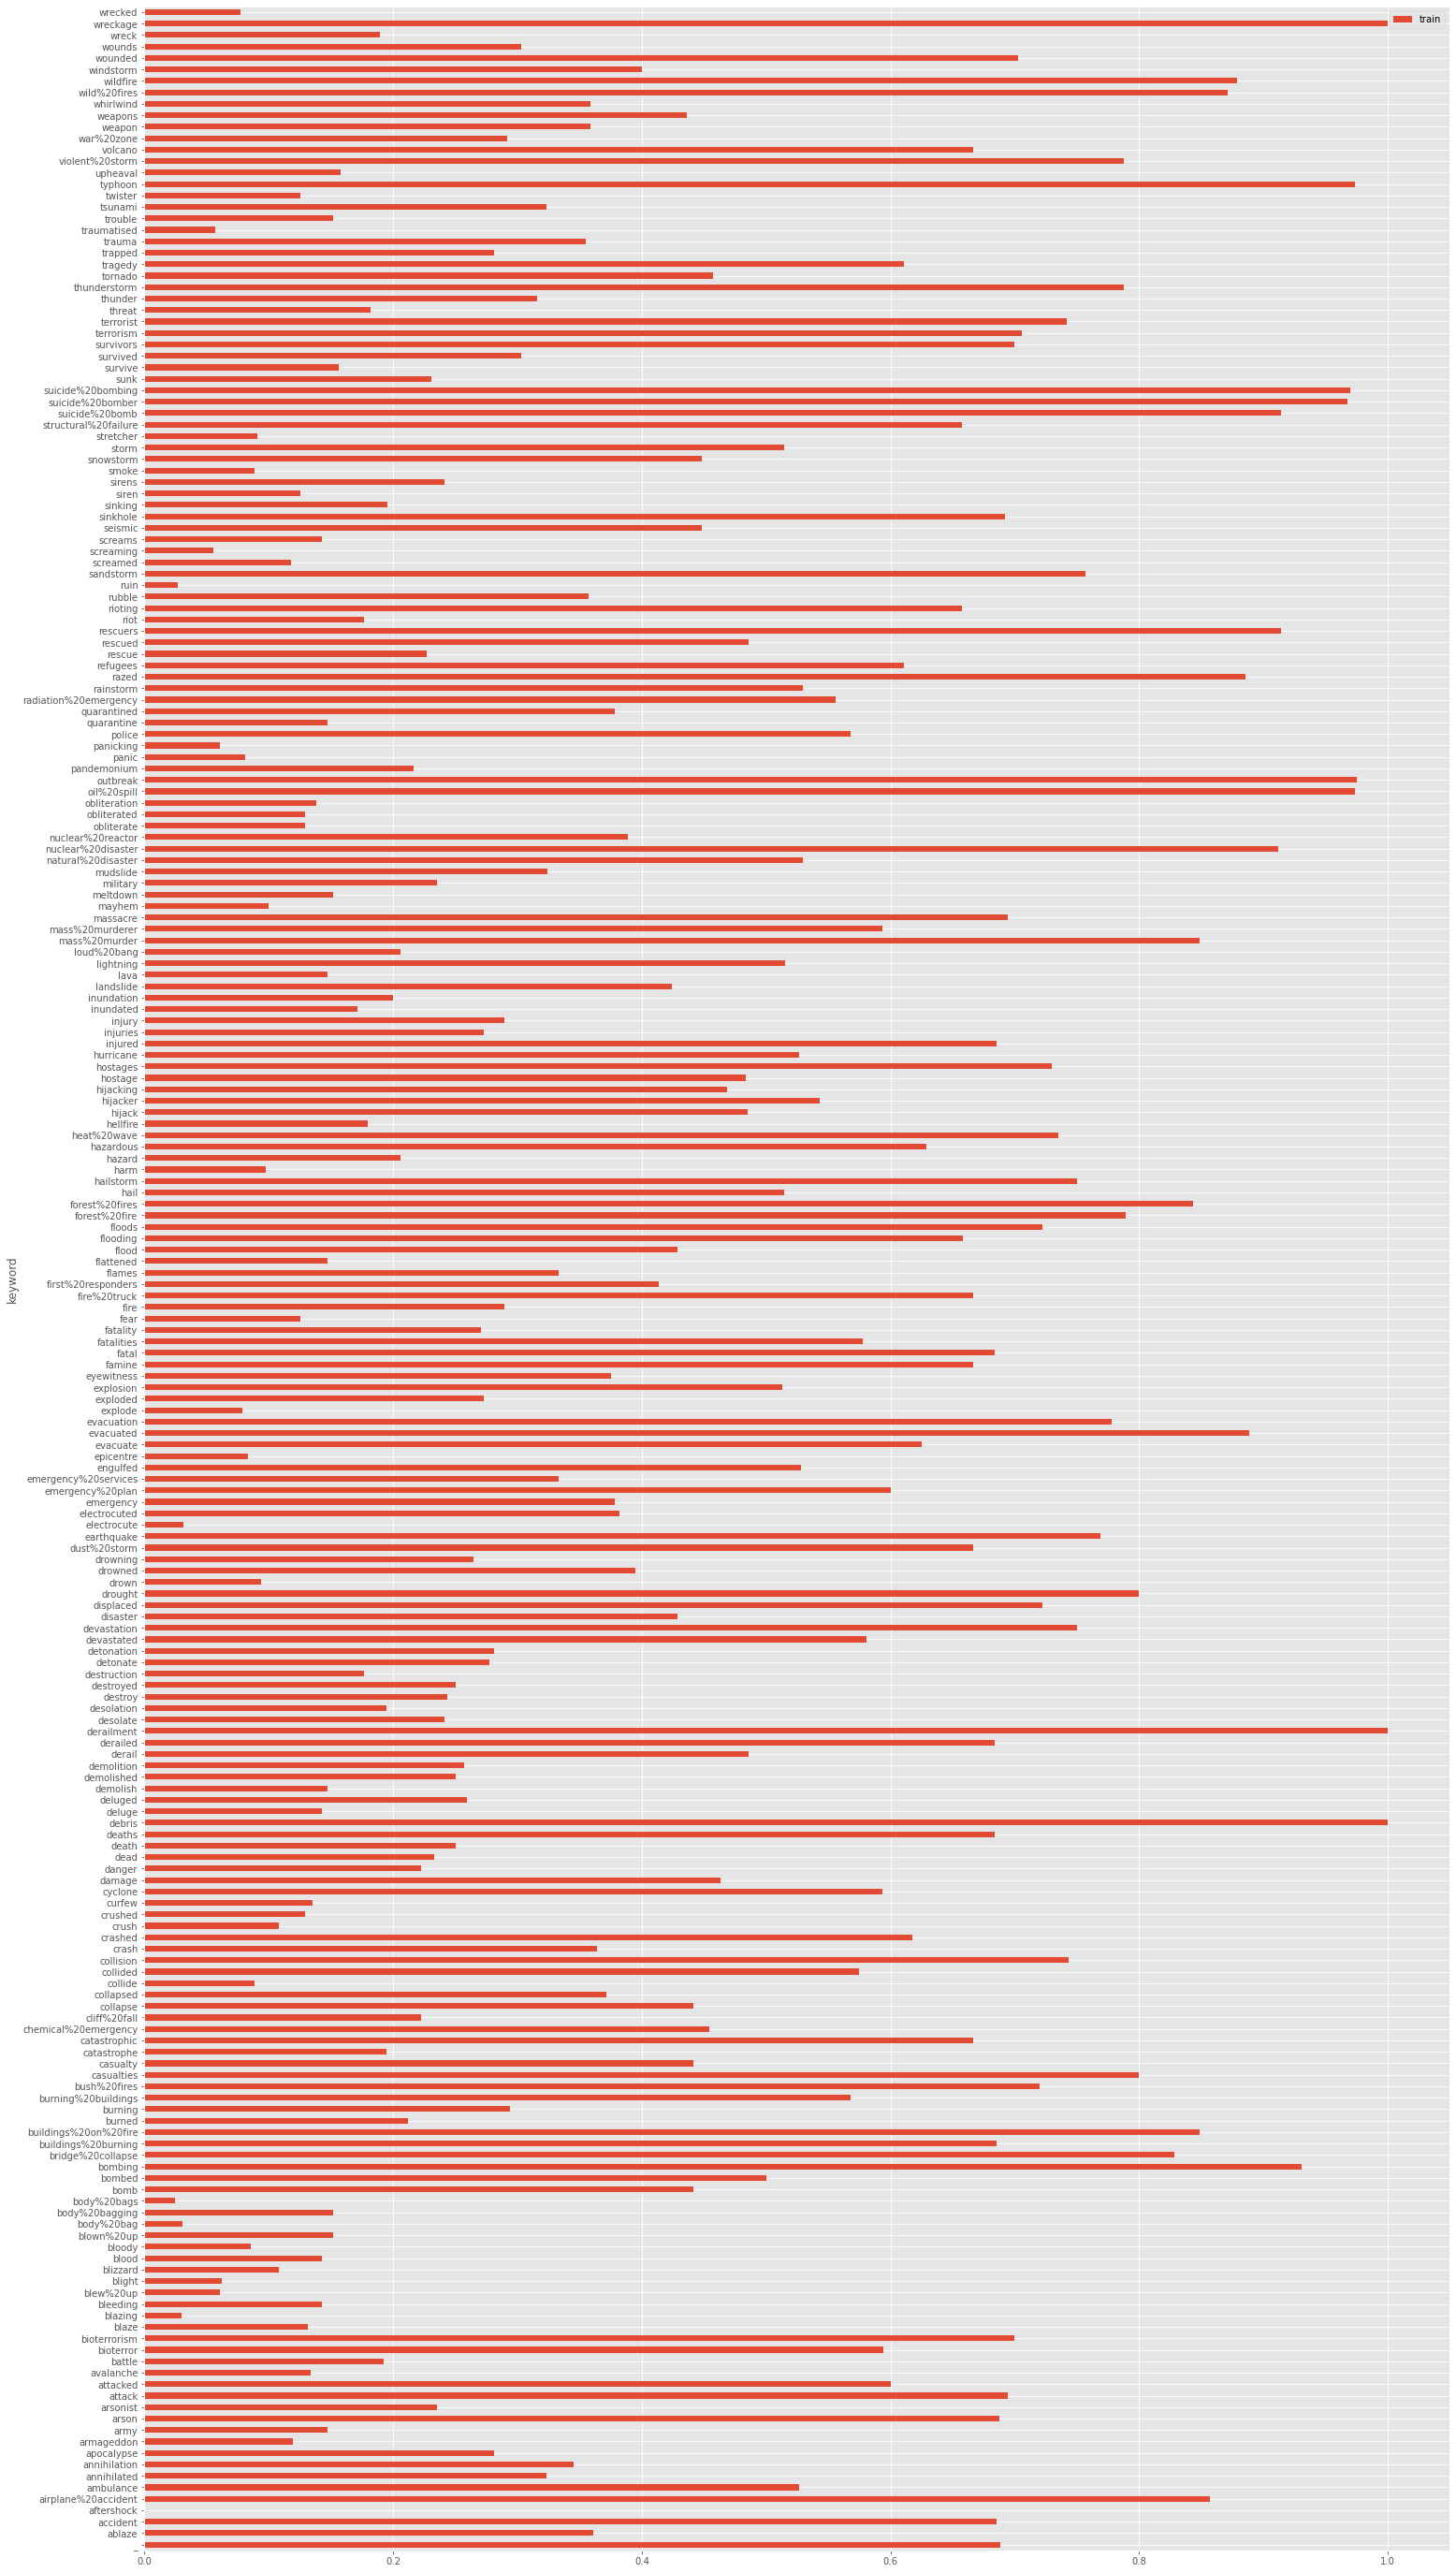

In [14]:
fig, ax = plt.subplots(figsize=(25, 50))
grouped_df.plot.barh(x='keyword', y='train', ax=ax)

* Some keywords are labelled in a unique way in the train set : aftershock, derailment, debris...
* Each group of tweets which share the same keyword does not follow the same proportion of labels : "ablaze" group is composed of 37% of disaster tweets while "accident" group is composed of 85% of disaster tweets in the training set.

This imbalance leaves us no choice but to **use pretrained embeddings**.

**Dummy model**

In [24]:
def dummy_classify(X_keywords_test):
    # Tweets are classified according to their associated keyword.
    # If the keyword is mainly used to describe disaster events, it will be classified as a disaster tweet (label 1).
    # Otherwise, it will be classified as 0.
    res = []
    for keyword in X_keywords_test:
        keyword = '_' if keyword is None else keyword
        pred = 0 if grouped_df[grouped_df['keyword'] == keyword]['train'].values[0] < 0.5 else 1
        res.append(pred)
    return np.array(res)

preds = dummy_classify(df[df['source'] == 'test']['keyword'])
truths = df[df['source'] == 'test']['target'].values
score = (preds == truths).astype(int).sum() / preds.shape[0]
print(f"Dummy model score : {score}")

Dummy model score : 0.7208090714066809


Restraining ourselves to the way keywords are labelled lead us to a accuracy of 0.7208.